<a href="https://colab.research.google.com/github/rnabilahusna/rnabilahusna/blob/main/BDM_assessment/EDA_Big_Data_Lab/Feature_Engineering_Lab3(a)_NabilaHusna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Feature Engineering Techniques for Training Machine Learning Models**

In [2]:
# Upload kaggle.json API token, and download / unzip California Housing csv

# Install and upload the kaggle.json file
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices
!unzip california-housing-prices.zip

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 107MB/s]
Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [3]:
# Read in the CSV into a Pandas DataFrame

import pandas as pd

df = pd.read_csv('housing.csv')
df = df.dropna()

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# Seperate into Train and Test DataFrames

df = df.sample(frac=1, random_state=2)
train_df = df[:17000]
train_df = train_df.reset_index(drop=True)
test_df = df[17000:]
test_df = test_df.reset_index(drop=True)

train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.58,39.16,33.0,1897.0,378.0,888.0,385.0,2.1111,68700.0,INLAND
1,-118.12,34.14,52.0,2337.0,352.0,981.0,328.0,5.8692,490400.0,<1H OCEAN
2,-122.23,37.76,52.0,1705.0,246.0,658.0,253.0,5.7500,306300.0,NEAR BAY
3,-122.19,37.74,36.0,847.0,212.0,567.0,159.0,1.1765,87100.0,NEAR BAY
4,-121.23,37.96,44.0,2204.0,473.0,1277.0,435.0,1.5539,59200.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16995,-122.56,37.98,36.0,2649.0,542.0,1111.0,557.0,4.8056,345700.0,NEAR BAY
16996,-122.47,37.76,49.0,2842.0,670.0,1396.0,648.0,3.2679,345700.0,NEAR BAY
16997,-117.23,32.75,11.0,4304.0,1245.0,1960.0,1105.0,3.3456,159800.0,NEAR OCEAN
16998,-118.35,34.32,52.0,102.0,29.0,54.0,32.0,1.9875,191700.0,<1H OCEAN


In [6]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN
1,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN
2,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN
3,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND
4,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3428,-117.62,33.43,27.0,3858.0,1062.0,2321.0,873.0,3.3155,231000.0,NEAR OCEAN
3429,-118.30,34.09,40.0,3058.0,1215.0,3953.0,1223.0,1.8156,218800.0,<1H OCEAN
3430,-119.95,38.95,22.0,1058.0,352.0,851.0,269.0,2.0200,87500.0,INLAND
3431,-119.73,36.83,14.0,3348.0,491.0,1584.0,493.0,5.0828,111400.0,INLAND


In [7]:
# Get observed outputs for train and test

y_train = train_df['median_house_value'].to_numpy()
y_test = test_df['median_house_value'].to_numpy()

y_train.shape, y_test.shape

((17000,), (3433,))

In [8]:
# Get error of baseline model that uses the average median_house_value in train_df

from sklearn.metrics import mean_absolute_error

average_median_house_value = train_df['median_house_value'].mean()
baseline_model_test_predictions = [average_median_house_value] * len(test_df)

mean_absolute_error(baseline_model_test_predictions, y_test)

90333.831769298

1. Dimensionality Reduction (PCA)

In [9]:
# Observe correlation between total_rooms, total_bedrooms and households

train_df[['total_rooms', 'total_bedrooms', 'households']].corr()

,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.929633,0.918357
total_bedrooms,0.929633,1.000000,0.979655
households,0.918357,0.979655,1.000000


In [10]:
# Get X_train_3 which has total_rooms, total_bedrooms, and households as inputs

import numpy as np

X_train_3 = train_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()

X_train_3.shape

(17000, 3)

In [11]:
# Get X_test_3 which has total_rooms, total_bedrooms, and households as inputs

X_test_3 = test_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()

X_test_3.shape

(3433, 3)

In [12]:
# Get error of random forest training on just (X_train_3, y_train) and testing on (X_test_3, y_test)

from sklearn.ensemble import RandomForestRegressor

forest_base = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_3, y_train)
forest_base_test_predictions = forest_base.predict(X_test_3)
mean_absolute_error(y_test, forest_base_test_predictions)

80140.62065813002

In [13]:
# Train PCA (Linear Dimensionality Reduction) with 2-feature output

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(X_train_3)

pca

PCA(n_components=2)

In [14]:
# Use PCA to transform X_train_3 and X_test_3 into X_train_pca and X_test_pca

X_train_pca = pca.transform(X_train_3)
X_test_pca = pca.transform(X_test_3)

X_train_pca.shape, X_test_pca.shape

((17000, 2), (3433, 2))

In [15]:
# Get error of Random Forest training on (X_train_pca, y_train) and testing on (X_test_pca, y_test)

forest_pca = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_pca, y_train)
forest_pca_test_predictions = forest_pca.predict(X_test_pca)

mean_absolute_error(y_test, forest_pca_test_predictions)

78402.16021793951

#### 2. Preprocessing / Scaling

In [16]:
X_train_3

array([[1897.,  378.,  385.],
       [2337.,  352.,  328.],
       [1705.,  246.,  253.],
       ...,
       [4304., 1245., 1105.],
       [ 102.,   29.,   32.],
       [1266.,  228.,  239.]])

(array([1.2711e+04, 3.4690e+03, 5.7300e+02, 1.4100e+02, 5.9000e+01,
        2.1000e+01, 1.4000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([-1.2702896 ,  0.25425982,  1.77880925,  3.30335868,  4.82790811,
         6.35245754,  7.87700697,  9.4015564 , 10.92610582, 12.45065525,
        13.97520468]),
 <BarContainer object of 10 artists>)

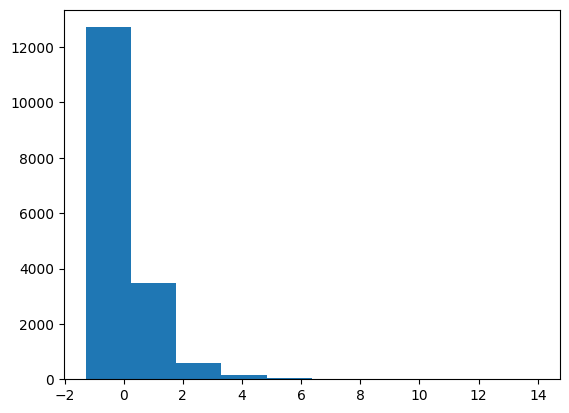

In [17]:
# Test different preprocessing functions on X_train_3

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
import matplotlib.pyplot as plt

scaler = StandardScaler().fit(X_train_3)
X_train_3_scaled = scaler.transform(X_train_3)

plt.hist(X_train_3_scaled[:, 1])

In [18]:
# Preprocess X_test_3

X_test_3_scaled = scaler.transform(X_test_3)

X_test_3_scaled.shape

(3433, 3)

In [19]:
# Get error of Random Forest training on (X_train_scaled, y_train) and testing on (X_test_scaled, y_test)

random_forest_scaled = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_3_scaled, y_train)
random_forest_scaled_test_predictions = random_forest_scaled.predict(X_test_3_scaled)

mean_absolute_error(y_test, random_forest_scaled_test_predictions)

80333.8236557174

In [20]:
# Create Pipeline of Normalization -> PCA -> RandomForest

from sklearn.pipeline import Pipeline

scale_pca_pipe_forest = Pipeline(steps=[('Scaler', Normalizer()),
                                 ('PCA', PCA(n_components=2)),
                                 ('Forest', RandomForestRegressor(n_estimators=50, max_depth=5))])
scale_pca_pipe_forest

Pipeline(steps=[('Scaler', Normalizer()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [21]:
# Get error of Normalization -> PCA -> Random Forest pipeline

scale_pca_pipe_forest.fit(X_train_3, y_train)
scale_pca_pipe_forest_test_predictions = scale_pca_pipe_forest.predict(X_test_3)

mean_absolute_error(y_test, scale_pca_pipe_forest_test_predictions)

76709.11392202177

#### 3. Categorical Encoding (Dummy / One-Hot)

In [22]:
# Get dummy variables (one-hot encoding) for the training set

train_dummies = pd.get_dummies(train_df['ocean_proximity'])
train_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,0,0


In [23]:
# Concatenate dummy variables to the training DataFrame

train_df = pd.concat([train_df, train_dummies], axis=1)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.58,39.16,33.0,1897.0,378.0,888.0,385.0,2.1111,68700.0,INLAND,0,1,0,0,0
1,-118.12,34.14,52.0,2337.0,352.0,981.0,328.0,5.8692,490400.0,<1H OCEAN,1,0,0,0,0
2,-122.23,37.76,52.0,1705.0,246.0,658.0,253.0,5.7500,306300.0,NEAR BAY,0,0,0,1,0
3,-122.19,37.74,36.0,847.0,212.0,567.0,159.0,1.1765,87100.0,NEAR BAY,0,0,0,1,0
4,-121.23,37.96,44.0,2204.0,473.0,1277.0,435.0,1.5539,59200.0,INLAND,0,1,0,0,0


In [24]:
# Observe frequency of categories

train_df['ocean_proximity'].value_counts()

<1H OCEAN     7522
INLAND        5406
NEAR OCEAN    2168
NEAR BAY      1900
ISLAND           4
Name: ocean_proximity, dtype: int64

In [25]:
# Drop the ISLAND dummy since there are very few of them

train_df.drop('ISLAND', inplace=True, axis=1)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-121.58,39.16,33.0,1897.0,378.0,888.0,385.0,2.1111,68700.0,INLAND,0,1,0,0
1,-118.12,34.14,52.0,2337.0,352.0,981.0,328.0,5.8692,490400.0,<1H OCEAN,1,0,0,0
2,-122.23,37.76,52.0,1705.0,246.0,658.0,253.0,5.7500,306300.0,NEAR BAY,0,0,1,0
3,-122.19,37.74,36.0,847.0,212.0,567.0,159.0,1.1765,87100.0,NEAR BAY,0,0,1,0
4,-121.23,37.96,44.0,2204.0,473.0,1277.0,435.0,1.5539,59200.0,INLAND,0,1,0,0


In [26]:
# Get dummy variables (one-hot encoding) for the test set

test_dummies = pd.get_dummies(test_df['ocean_proximity'])
test_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [27]:
# Append the dummies and drop ISLAND on the test DataFrame

test_df = pd.concat([test_df, test_dummies], axis=1)
test_df.drop('ISLAND', inplace=True, axis=1)
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN,1,0,0,0
1,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN,1,0,0,0
2,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN,1,0,0,0
3,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND,0,1,0,0
4,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN,1,0,0,0


In [28]:
# Make X_train_dummies using only dummies

X_train_dummies = train_df.to_numpy()[:, -4:]
X_train_dummies.shape

(17000, 4)

In [29]:
# Make X_test_dummies using only dummies

X_test_dummies = test_df.to_numpy()[:, -4:]
X_test_dummies.shape

(3433, 4)

In [30]:
# Check error of linear regression model using only dummies

from sklearn.linear_model import LinearRegression

linear_dummy = LinearRegression().fit(X_train_dummies, y_train)
linear_dummy_test_predictions = linear_dummy.predict(X_test_dummies)
mean_absolute_error(y_test, linear_dummy_test_predictions)

76508.46548376785

#### 4. Binning (Grouping, Aggregating)

<Axes: >

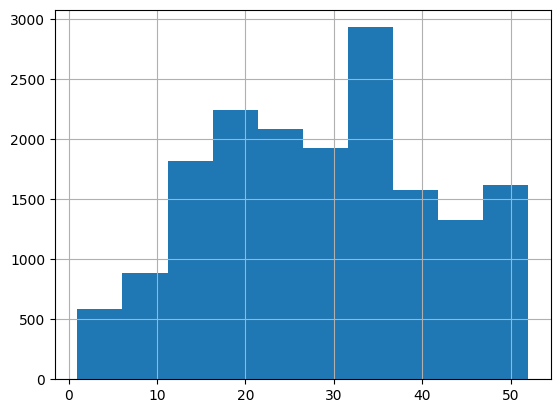

In [31]:
train_df['housing_median_age'].hist()

In [32]:
# Add new binary column to training DataFrame where median_age < 30

train_df['median_age_less_than_30'] = (train_df['housing_median_age'] < 30).astype(int)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_age_less_than_30
0,-121.58,39.16,33.0,1897.0,378.0,888.0,385.0,2.1111,68700.0,INLAND,0,1,0,0,0
1,-118.12,34.14,52.0,2337.0,352.0,981.0,328.0,5.8692,490400.0,<1H OCEAN,1,0,0,0,0
2,-122.23,37.76,52.0,1705.0,246.0,658.0,253.0,5.7500,306300.0,NEAR BAY,0,0,1,0,0
3,-122.19,37.74,36.0,847.0,212.0,567.0,159.0,1.1765,87100.0,NEAR BAY,0,0,1,0,0
4,-121.23,37.96,44.0,2204.0,473.0,1277.0,435.0,1.5539,59200.0,INLAND,0,1,0,0,0


In [33]:
# Setup X_train_median_age which only uses the binary indicator

X_train_median_age = train_df['median_age_less_than_30'].to_numpy().reshape(-1, 1)
X_train_median_age.shape

(17000, 1)

In [34]:
# Setup X_test_median_age which only uses the binary indicator

test_df['median_age_less_than_30'] = (test_df['housing_median_age'] < 30).astype(int)
X_test_median_age = test_df['median_age_less_than_30'].to_numpy().reshape(-1, 1)
X_test_median_age.shape

(3433, 1)

In [35]:
# Check error of linear model that only uses the binary variable

linear_median_age = LinearRegression().fit(X_train_median_age, y_train)
linear_median_age_test_predictions = linear_median_age.predict(X_test_median_age)
mean_absolute_error(y_test, linear_median_age_test_predictions)

90238.92369212458

#### 5. Clustering

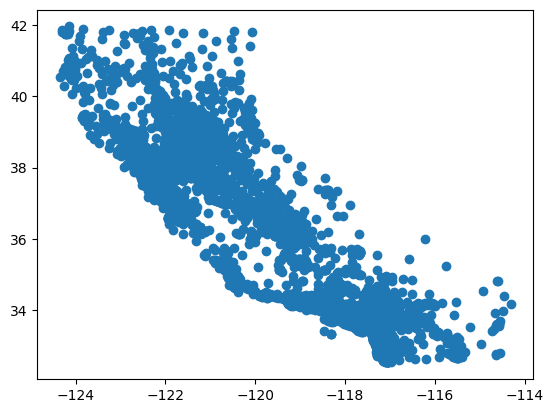

In [36]:
# Plot map of California!

plt.scatter(train_df['longitude'], train_df['latitude'])

In [37]:
# Make KMeans model from Longitude & Latitude and get clusters

from sklearn.cluster import KMeans

X_train_lat_long = train_df[['longitude', 'latitude']].to_numpy()
kmeans = KMeans(n_clusters=7).fit(X_train_lat_long)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 2, ..., 5, 1, 2], dtype=int32)

In [38]:
# Plot colored map of California

import plotly.express as px

px.scatter(x=train_df['longitude'], y=train_df['latitude'], color=kmeans.labels_)

In [39]:
# Make X_train_clustering which uses a one-hot encoding from the cluster label

X_train_clustering = pd.get_dummies(pd.Series(kmeans.labels_)).to_numpy()
X_train_clustering

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [40]:
# Predict the clusters for the test data, and create X_test_clustering using one-hot encoding

X_test_lat_long = test_df[['longitude', 'latitude']].to_numpy()
X_test_clustering = pd.get_dummies(pd.Series(kmeans.predict(X_test_lat_long))).to_numpy()
X_test_clustering.shape

(3433, 7)

In [41]:
# Check error of linear model that only uses the cluster one-hot encodings

linear_clustering = LinearRegression().fit(X_train_clustering, y_train)
linear_clustering_test_predictions = linear_clustering.predict(X_test_clustering)
mean_absolute_error(linear_clustering_test_predictions, y_test)

76600.4206233615

#### 6. Feature Selection (Combinations of Features)

In [42]:
# Observe shapes of X_train_clustering, X_train_scaled and dummy_X_train

X_train_clustering.shape, X_train_3_scaled.shape, X_train_dummies.shape

((17000, 7), (17000, 3), (17000, 4))

In [43]:
# Concatenate the training arrays side-by-side to make one big X_train_full input matrix

X_train_full = np.concatenate([X_train_clustering, X_train_3_scaled, X_train_dummies], axis=1)
X_train_full

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=object)

In [44]:
# Observe shapes of X_test_clustering, X_test_scaled and dummy_X_test

X_test_clustering.shape, X_test_3_scaled.shape, X_test_dummies.shape

((3433, 7), (3433, 3), (3433, 4))

In [45]:
# Concatenate the test arrays side-by-side to make one big X_train_full input matrix

X_test_full = np.concatenate([X_test_clustering, X_test_3_scaled, X_test_dummies], axis=1)
X_test_full.shape

(3433, 14)

In [46]:
# Check error of a random forest that uses the combination of these features

random_forest_full = RandomForestRegressor().fit(X_train_full, y_train)
random_forest_full_test_predictions = random_forest_full.predict(X_test_full)

mean_absolute_error(random_forest_full_test_predictions, y_test)

59372.2813525585